# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Risma Saputri
- **Email:** rismasaputri@mail.ugm.ac.id
- **ID Dicoding:** imrismaa

## Menentukan Pertanyaan Bisnis

- Kapan tingkat polusi paling tinggi terjadi?
- Bagaimana hubungan antar polutan yang memengaruhi kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
guanyuan_air_quality_df = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_air_quality_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


**Insight:**
##### Pada dataset ini, terdapat beberapa feature antara lain
- No
- year
- month
- day
- hour
- PM2.5 : Particulate Matter 2,5 mikrometer atau lebih kecil
- PM10 : Particulater Matter 10 mikrometer atau lebih kecil
- SO2 (Sulfur Dioksida)
- NO2 (Nitrogen Dioksida)
- CO (Karbon Monoksida)
- O3 (Ozon)

##### Dataset ini terdiri dari 35064 baris data dan 18 kolom

### Assessing Data

In [3]:
guanyuan_air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
guanyuan_air_quality_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Insight:**
- terdapat 616 missing value pada kolom PM2.5
- terdapat 429 missing value pada kolom PM10
- terdapat 474 missing value pada kolom S02
- terdapat 659 missing value pada kolom NO2
- terdapat 1753 missing value pada kolom CO
- terdapat 1173 missing value pada kolom O3
- terdapat 20 missing value pada kolom TEMP
- terdapat 20 missing value pada kolom PRES
- terdapat 20 missing value pada kolom DEWP
- terdapat 20 missing value pada kolom RAIN
- terdapat 81 missing value pada kolom wd
- terdapat 14 missing value pada kolom WSPM

In [5]:
guanyuan_air_quality_df.duplicated().sum()

0

**Insight:**
- tidak ada duplicated row pada dataframe

In [6]:
guanyuan_air_quality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Cleaning Data

Data cleaning dengan metode interpolate

In [7]:
guanyuan_air_quality_df.interpolate(method='linear', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19760\1058666135.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  guanyuan_air_quality_df.interpolate(method='linear', inplace=True)


In [8]:
guanyuan_air_quality_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

**Insight:**
- masih terdapat missing value pada kolom wd karena tipe datanya object

In [9]:
guanyuan_air_quality_df.wd.value_counts()

wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

**Insight:**
- mode dari kolom ini adalah NE dengan jumlah data sebanyak 5140

Menangani missing value menggunakan metode imputation dengan nilai mode

In [10]:
guanyuan_air_quality_df['wd'].fillna(guanyuan_air_quality_df['wd'].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19760\2872407460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan_air_quality_df['wd'].fillna(guanyuan_air_quality_df['wd'].mode()[0], inplace=True)


In [11]:
guanyuan_air_quality_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- missing value sudah teratasi

## Exploratory Data Analysis (EDA)

### Explore guanyuan_air_quality_df

In [12]:
guanyuan_air_quality_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.581414,1011.851650,3.120296,0.067383,NaN,1.708577,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.070279,92.340966,23.631529,35.210206,1151.647467,57.199174,11.400426,10.404517,13.690314,0.909798,NaN,1.204180,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,149.000000,22.000000,78.270244,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


**Insight:**
- Dari rangkuman parameter statistik di atas, diperoleh informasi bahwa rata-rata jumlah PM2.5 dan PM10 masing-masing sebesar 82.897522 dan 109.372349 dengan standar deviasi masing-masing sebesar 81.070279 dan 92.340966

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan tingkat polusi paling tinggi terjadi?

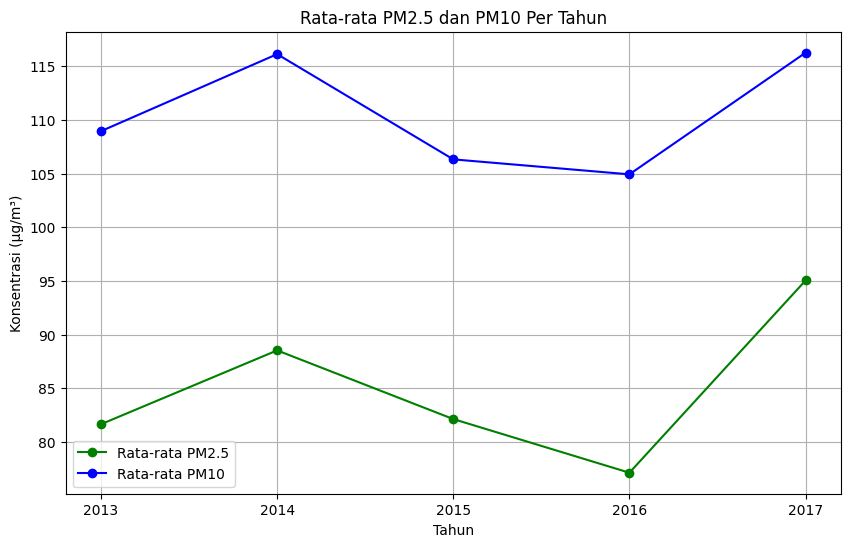

In [13]:
avg_pm25 = guanyuan_air_quality_df.groupby('year')['PM2.5'].mean().reset_index()
avg_pm10 = guanyuan_air_quality_df.groupby('year')['PM10'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_pm25['year'], avg_pm25['PM2.5'], marker='o', label='Rata-rata PM2.5', color='green')
plt.plot(avg_pm10['year'], avg_pm10['PM10'], marker='o', label='Rata-rata PM10', color='blue')

plt.title('Rata-rata PM2.5 dan PM10 Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m³)')
plt.grid()
plt.legend()
plt.xticks(avg_pm25['year'])

plt.show()

In [14]:
avg_pm25 = guanyuan_air_quality_df.groupby('year')['PM2.5'].mean().reset_index()
avg_pm10 = guanyuan_air_quality_df.groupby('year')['PM10'].mean().reset_index()
print(str(avg_pm25) + "\n" + str(avg_pm10))

   year      PM2.5
0  2013  81.651893
1  2014  88.527374
2  2015  82.130183
3  2016  77.132514
4  2017  95.038842
   year        PM10
0  2013  108.949074
1  2014  116.123402
2  2015  106.321067
3  2016  104.927026
4  2017  116.255297


**Insight:**
- Tingkat rata-rata PM10 paling tinggi terjadi pada tahun 2014 dan 2017, yaitu sebesar 116.123402 dan 116.255297
- Tingkat rata-rata PM2.5 paling tinggi terjadi pada tahun 2017, yaitu sebsesar 95.038842

### Pertanyaan 2: Bagaimana hubungan antar polutan yang memengaruhi kualitas udara?

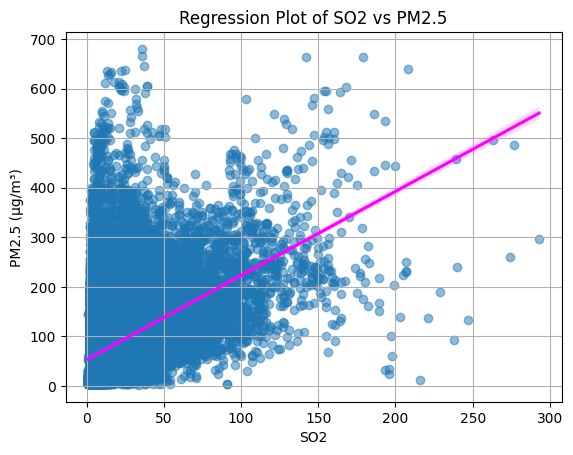

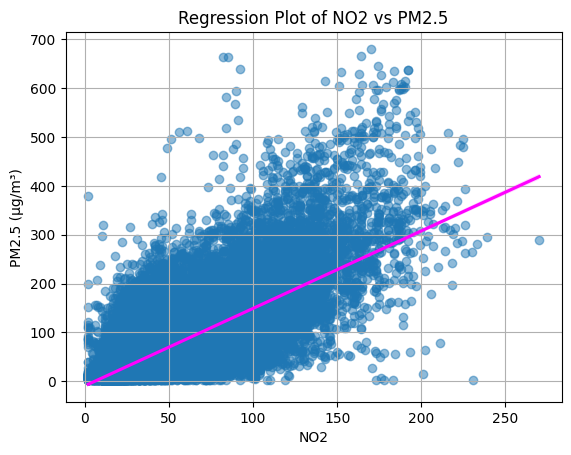

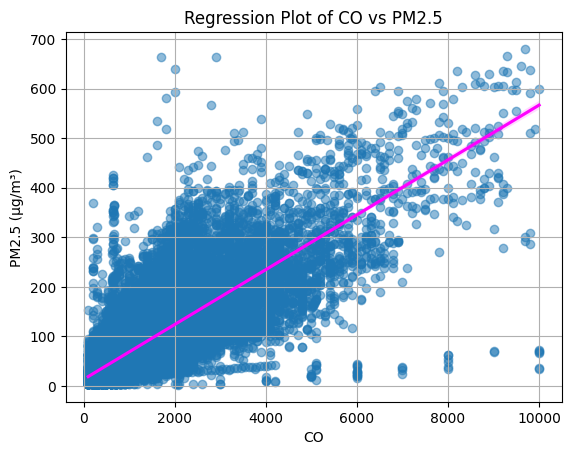

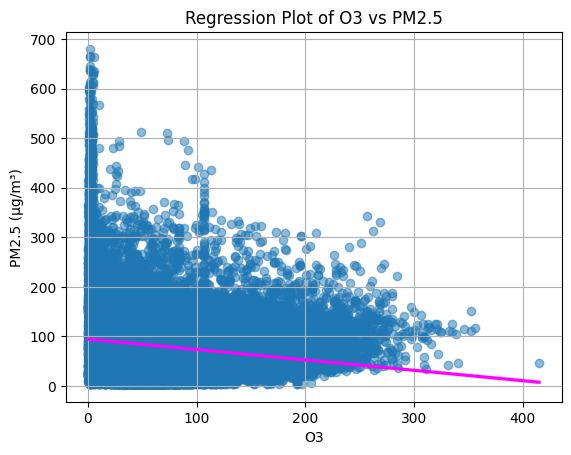

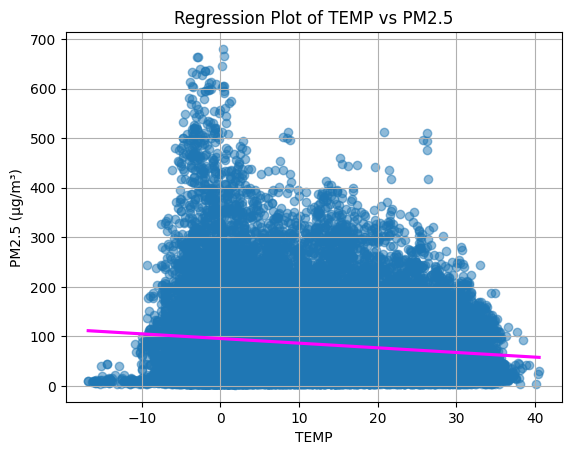

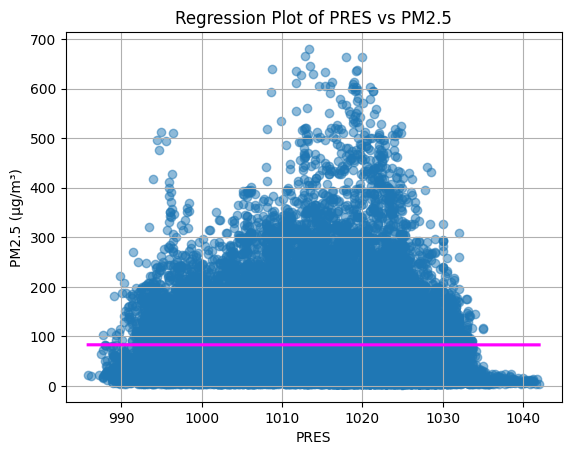

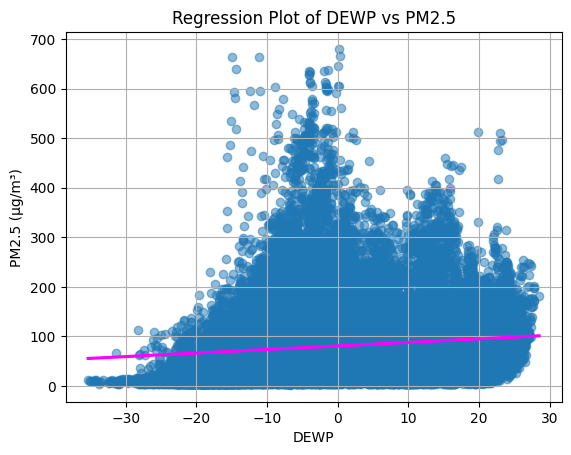

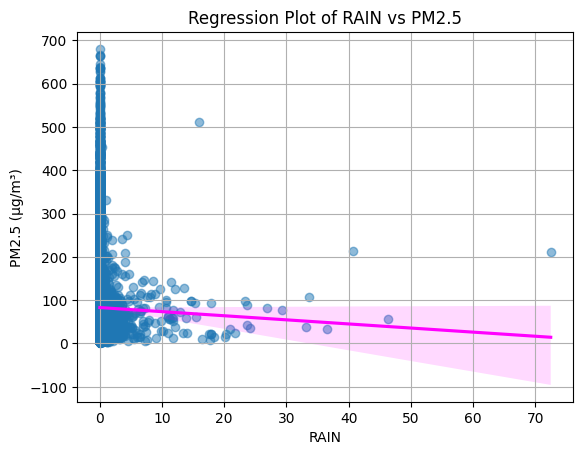

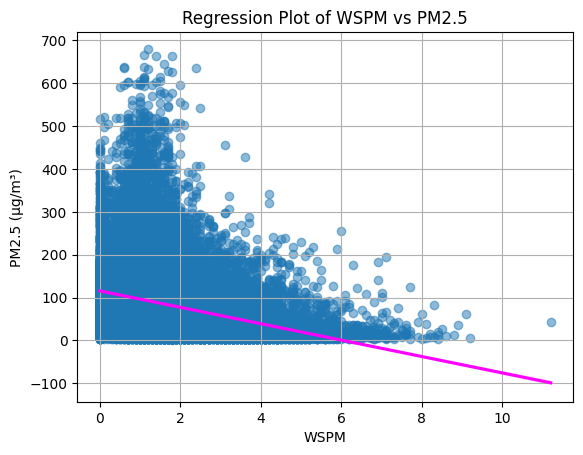

In [15]:
numeric_factor = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for column in numeric_factor:
    sns.regplot(x=guanyuan_air_quality_df[column], y=guanyuan_air_quality_df['PM2.5'], scatter_kws={'alpha':0.5}, line_kws={'color':'magenta'})

    plt.title(f'Regression Plot of {column} vs PM2.5')
    plt.xlabel(f'{column}')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid()
    plt.show()

**Insight:**
- Dari grafik regression plot di atas, dapat dilihat bahwa SO2, NO2, CO berbanding lurus dengan PM2.5
- rain dan wspm terlihat berbanding terbalik dengan PM.25

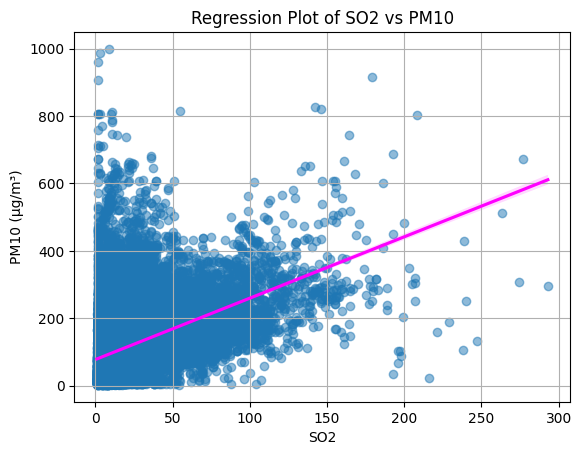

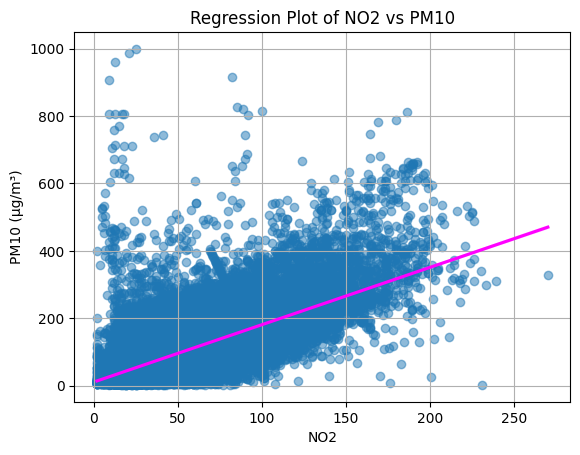

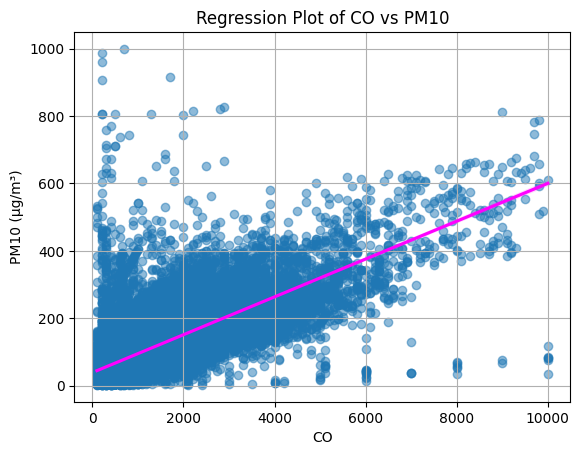

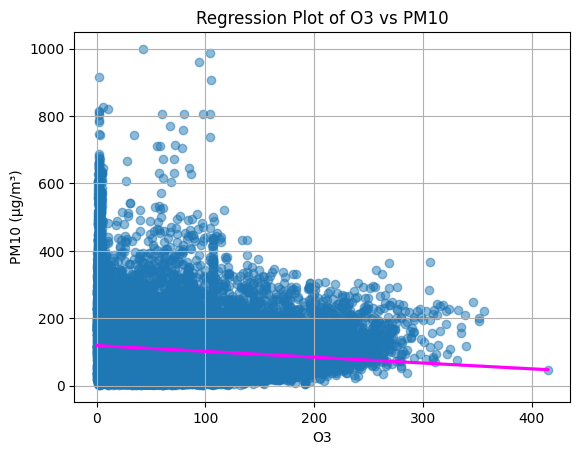

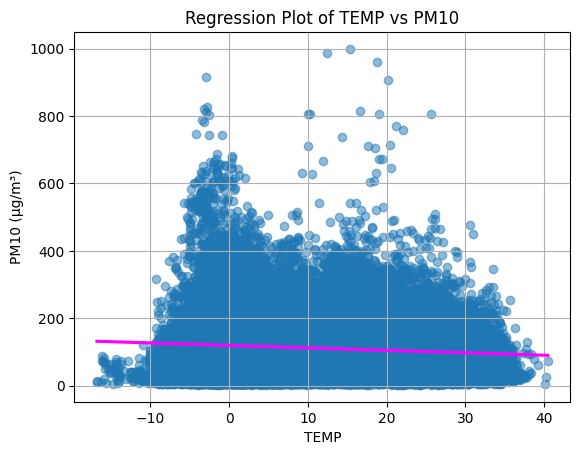

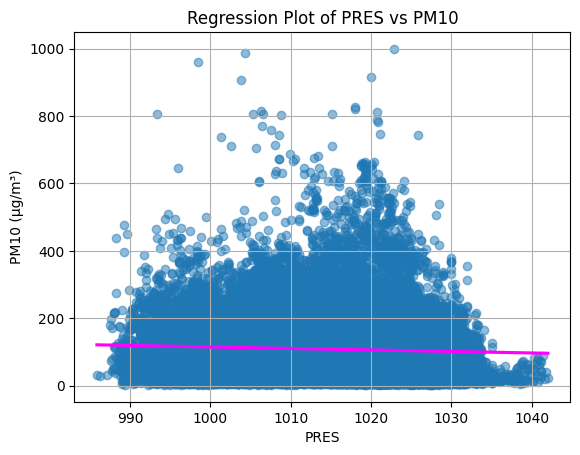

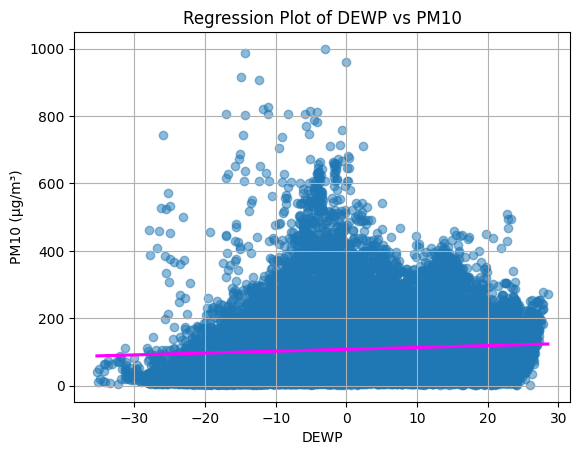

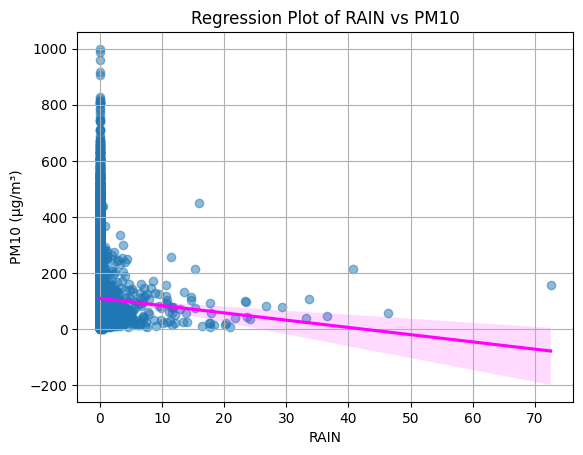

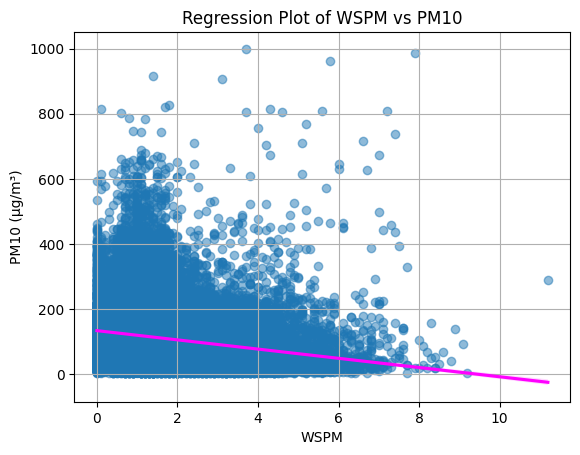

In [16]:
numeric_factor = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for column in numeric_factor:
    sns.regplot(x=guanyuan_air_quality_df[column], y=guanyuan_air_quality_df['PM10'], scatter_kws={'alpha':0.5}, line_kws={'color':'magenta'})

    plt.title(f'Regression Plot of {column} vs PM10')
    plt.xlabel(f'{column}')
    plt.ylabel('PM10 (µg/m³)')
    plt.grid()
    plt.show()

**Insight:**
- Dari grafik regression plot di atas, dapat dilihat bahwa SO2, NO2, CO berbanding lurus dengan PM10
- rain dan wspm terlihat berbanding terbalik dengan PM10

In [17]:
numeric_factor = guanyuan_air_quality_df.select_dtypes(include='float64')
numeric_factor.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.886022,0.494901,0.688364,0.786156,-0.147852,-0.132063,-0.000325,0.121088,-0.010613,-0.284217
PM10,0.886022,1.000000,0.465970,0.649267,0.700194,-0.107093,-0.089934,-0.050269,0.081972,-0.025489,-0.184675
SO2,0.494901,0.465970,1.000000,0.521432,0.551996,-0.187212,-0.360216,0.211667,-0.270389,-0.039844,-0.139100
NO2,0.688364,0.649267,0.521432,1.000000,0.718719,-0.508825,-0.322036,0.148429,-0.049350,-0.046678,-0.453884
CO,0.786156,0.700194,0.551996,0.718719,1.000000,-0.300855,-0.302347,0.153008,-0.035428,-0.011129,-0.302230
O3,-0.147852,-0.107093,-0.187212,-0.508825,-0.300855,1.000000,0.612862,-0.460984,0.342255,0.023376,0.307140
TEMP,-0.132063,-0.089934,-0.360216,-0.322036,-0.302347,0.612862,1.000000,-0.827183,0.823197,0.036607,0.037862
PRES,-0.000325,-0.050269,0.211667,0.148429,0.153008,-0.460984,-0.827183,1.000000,-0.776443,-0.060416,0.071479
DEWP,0.121088,0.081972,-0.270389,-0.049350,-0.035428,0.342255,0.823197,-0.776443,1.000000,0.080772,-0.304990
RAIN,-0.010613,-0.025489,-0.039844,-0.046678,-0.011129,0.023376,0.036607,-0.060416,0.080772,1.000000,0.022449


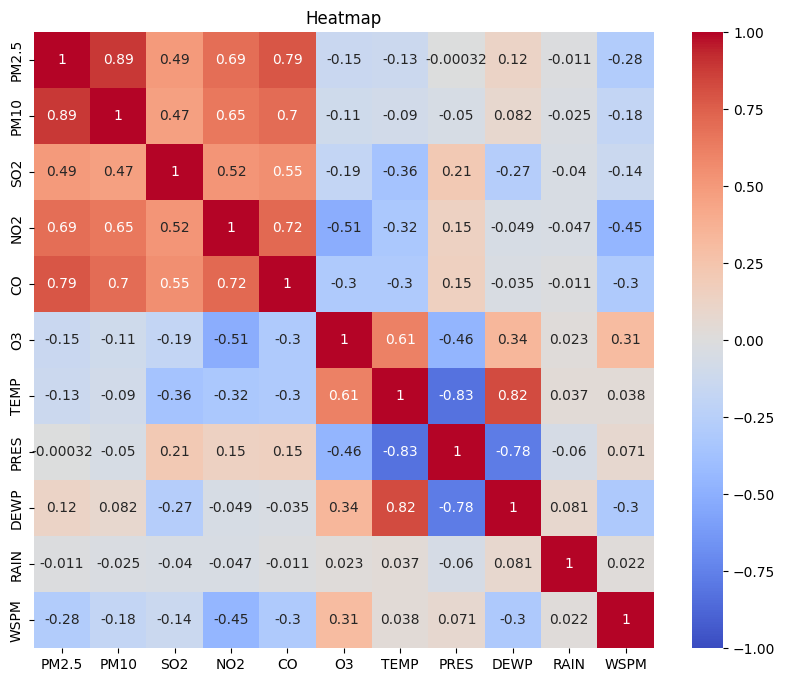

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_factor.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.show()

**Insight:**
- Dapat dilihat bahwa S02, NO2, dan CO memiliki korelasi positif dengan PM2.5 dan PM10
- Dapat dilihat bahwa O3, temp, pres, rain, dan wspm memiliki korelasi negatif dengan PM2.5 dan PM10

## Conclusion

#### Conclusion pertanyaan 1 (Kapan tingkat polusi paling tinggi terjadi?)
- Tingkat polusi paling tinggi terjadi pada tahun 2017, dengan rata-rata konsentrasi atau nilai PM2.5 pada tahun 2017 sebesar 95.038842, serta rata-rata konsentrasi atau nilai PM10 pada tahun 2014 dan 2017 masing-masing 116.123402 dan 116.255297
#### Conclusion pertanyaan 2 (Bagaimana hubungan antar polutan yang memengaruhi kualitas udara?)
- PM2.5 dan PM10 meningkat seiring meningkatnya konsentrasi SO2, NO2, dan CO.
- PM2.5 dan PM10 menurun seiring meningkatnya nilai rain dan wspm. Hal ini menunjukkan bahwa hujan dan angin dapat mengurangi tingkat polusi udara.